# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [2]:
col_names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',names=col_names,sep='\s+')
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

<b>Data types of all the columns are numeric except horse power and car name

In [4]:
data.shape

(398, 9)

In [5]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [6]:
#Convert Horse Power to numeric data type if there are errors in conversion,convert those values to NaN
data['horsepower']=pd.to_numeric(data['horsepower'],errors='coerce')
data['horsepower'].dtype

dtype('float64')

In [7]:
#Check for NA values
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<b>horse power has 6 NaN values.

In [8]:
#Fill NA with mean 
data['horsepower'].fillna(data['horsepower'].median(),inplace=True)

In [9]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<b>Now there are no missing or NA values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [10]:
#Correlation
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


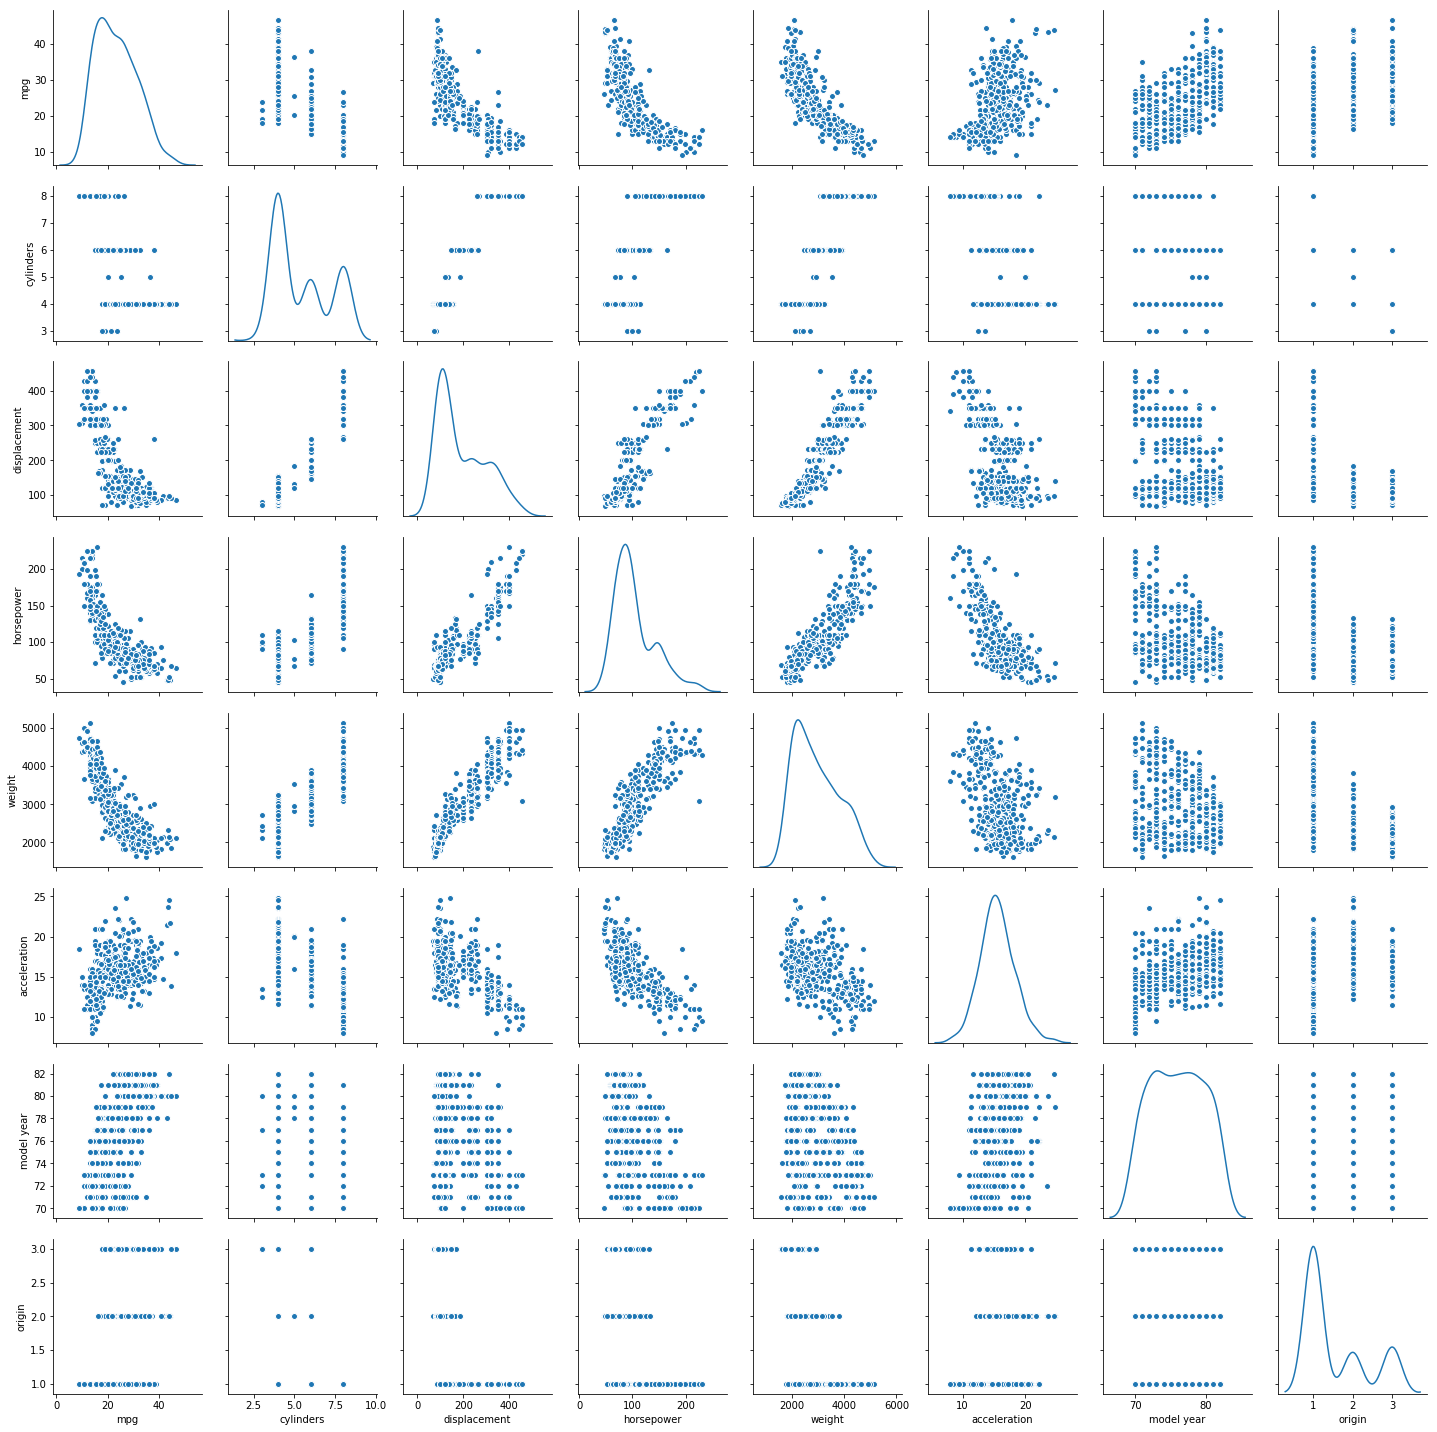

In [11]:
sns.pairplot(data,diag_kind='kde')

<h3>Observations</h3><br>
<b>1.mpg column has negative correlation with cylinder,displacement,horse power and weight while positive correlation with acceleratio,model year and origin.<br>2.cylinders column has positive correlation with displacement,horse power and weight while negative correlation with mpg,acceleration,model year and origin.<br>3.displacement column has positive correlation with cylinders,horse power and weight while negative correlation with mpg,acceleration,model year and origin.<br>4.horse power column has positive correlation with cylinders,displacement and weight while negative correlation with mpg,acceleration,model year and origin.<br>5.weight column has positive correlation with cylinders,horse power and displacement while negative correlation with mpg,acceleration,model year and origin.<br>6.acceleration column has positive correlation with mpg,model year and origin while negative correlation with cylinders,displacement,horse power and weight.<br>7.model year column has positive correlation with mpg,acceleration and origin while negative correlation with cylinders,displacement,horse power and weight.<br>8.origin has positive correlation with mpg,model year and acceletation while negative correlation with cylinders,displacement,horse power and weight.

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [61]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age
from sklearn.preprocessing import OneHotEncoder

In [63]:
#Fit origin column according to one hot encoder
le=OneHotEncoder()
enc=OHE.fit_transform(data['origin'].values.reshape(-1,1)).toarray()
enc.shape

(398, 3)

In [15]:
df_encoded = pd.DataFrame(enc, columns = ["Origin_"+str(int(i)) for i in range(enc.shape[1])])
df=pd.concat([data.drop('origin',axis=1),df_encoded],axis=1)
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,Origin_0,Origin_1,Origin_2
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,1.0,0.0,0.0


In [16]:
#Convert model year to age
df.loc[:]['model year']=83-df.loc[:]['model year']
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,Origin_0,Origin_1,Origin_2
0,18.0,8,307.0,130.0,3504.0,12.0,13,chevrolet chevelle malibu,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,13,buick skylark 320,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,13,plymouth satellite,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,13,amc rebel sst,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,13,ford torino,1.0,0.0,0.0


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [17]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
col=list(df.columns)
col.remove('car name')

In [23]:
df_scaled=pd.DataFrame(scaler.fit_transform(df.drop('car name',axis=1)),columns=col)
df_scaled.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Origin_0,Origin_1,Origin_2
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,1.627426,0.773559,-0.461968,-0.497643
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,1.627426,0.773559,-0.461968,-0.497643
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,1.627426,0.773559,-0.461968,-0.497643
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,1.627426,0.773559,-0.461968,-0.497643
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,1.627426,0.773559,-0.461968,-0.497643


In [27]:
#Outlier Detection
q1=df_scaled.quantile(0.25)
q3=df_scaled.quantile(0.75)
IQR=q3-q1

mpg             1.473196
cylinders       2.354512
displacement    1.514806
horsepower      1.283577
weight          1.636660
acceleration    1.216314
model year      1.624705
Origin_0        2.066285
Origin_1        0.000000
Origin_2        0.000000
dtype: float64

In [53]:
#Outliers excluding dummy variables
outlier_row={row for row in range(df_scaled.shape[0]) for col in range(df_scaled.shape[1]-3)\
             if (df_scaled.loc[row][col]>(q3[col]+1.5*IQR[col]) or df_scaled.loc[row][col]<(q1[col]-1.5*IQR[col]))}
outlier_row

{6,
 7,
 8,
 9,
 11,
 13,
 25,
 26,
 27,
 59,
 67,
 94,
 95,
 116,
 195,
 299,
 300,
 322,
 326,
 394}

In [55]:
df_scaled.drop(outlier_row,inplace=True,axis=0)

In [56]:
df_scaled.shape

(378, 10)

<b> 20 rows having outliers are removed

# Q7. Create appropriate clusters with the new data set

In [99]:
#From pair plot assuming number of clusers to be between 2 to 8 
cluster_range = range( 2, 9)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_scaled)
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2683.846328
1,3,1992.790577
2,4,1341.279350
3,5,819.333878
4,6,740.558843
5,7,677.385871
6,8,633.160320


# Q8. Identify the appropriate clusters with result from above question

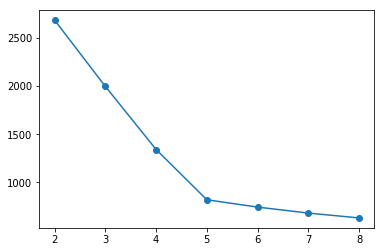

In [97]:
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

<b>From elbow plot it is evident that 5 clusters will be appropriate.

In [78]:
cluster = KMeans(5, n_init = 5)
cluster.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [82]:
centroid=cluster.cluster_centers_
centroid

array([[ 0.55707103, -0.77886952, -0.61593764, -0.54376419, -0.59632586,
         0.26144129, -0.59941697,  0.77355903, -0.46196822, -0.49764335],
       [-1.11926901,  1.48417631,  1.40234435,  1.30835715,  1.36312111,
        -0.95316681,  0.52817163,  0.77355903, -0.46196822, -0.49764335],
       [ 0.86201381, -0.79594847, -0.8690597 , -0.63598294, -0.88412261,
         0.21127908, -0.37915362, -1.29272617, -0.46196822,  2.00947124],
       [ 0.51016086, -0.75821591, -0.80765024, -0.5731505 , -0.65075566,
         0.28059414,  0.09298283, -1.29272617,  2.16465108, -0.49764335],
       [-0.5523677 ,  0.41638853,  0.38766946, -0.12885238,  0.35899457,
         0.40655665,  0.14543201,  0.77355903, -0.46196822, -0.49764335]])

In [88]:
labels=cluster.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 4, 2, 3, 3, 3, 3, 3, 4, 1, 2, 0,
       2, 0, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 4, 0, 3, 3, 3,
       2, 2, 3, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3,
       3, 3, 3, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4,
       4, 3, 1, 1, 1, 1, 4, 2, 0, 2, 2, 0, 4, 3, 1, 3, 3, 3, 3, 1, 3, 2,
       1, 4, 4, 4, 4, 2, 0, 2, 0, 4, 4, 4, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2,
       0, 3, 3, 2, 2, 3, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 2,
       0, 4, 0, 2, 3, 2, 4, 3, 4, 3, 3, 3, 3, 2, 3, 3, 0, 0, 3, 1, 1, 1,
       1, 4, 4, 4, 4, 0, 3, 2, 4, 4, 4, 4, 3, 2, 2, 0, 3, 1, 3, 2, 3, 1,
       1, 1, 1, 2, 0, 3, 0, 2, 1, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 3, 0,
       2, 0, 0, 0, 2, 3, 2, 3, 2, 3, 0, 2, 2, 2, 4, 1, 1, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 4, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 2, 3, 3, 3, 3, 3,
       2, 4, 4, 0, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 3, 2, 0, 0, 3, 4, 0, 0,
       2, 3, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 4, 3,

# Q9. Check for no of values in each cluster and centers for each variables. 

In [89]:
df_scaled['Group']=cluster.predict(df_scaled)

In [90]:
df_scaled['Group'].value_counts()

1    84
2    78
0    76
4    74
3    66
Name: Group, dtype: int64

# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [93]:
#Already assigned groups to data frame in previous step
df_scaled.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Origin_0,Origin_1,Origin_2,Group
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,1.627426,0.773559,-0.461968,-0.497643,1
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,1.627426,0.773559,-0.461968,-0.497643,1
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,1.627426,0.773559,-0.461968,-0.497643,1
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,1.627426,0.773559,-0.461968,-0.497643,1
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,1.627426,0.773559,-0.461968,-0.497643,1
